In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy
from scipy import stats

%matplotlib notebook
ticklabelsize = 15
fontsize = 20
linewidth = 2
rcParams['xtick.labelsize'] = ticklabelsize 
rcParams['ytick.labelsize'] = ticklabelsize 

stdstateH = 8.05
stdstatesigma0 = 0.19
stdstatenu_kin = 49.0
stdstatesigma = 0.2
stdstateL = 25.0
stdstatec_r = 0.25
stdstateD = .0002
nmpermonolayer = 0.3
umpersec_over_mlyperus = (nmpermonolayer/1e3*1e6)
errorinH = 0.2*2

slopefactor = stdstatenu_kin*stdstateL**2*stdstatec_r*stdstatesigma/stdstateD # (um/s)(um^2)(%)/(um^2/us)
slopefactorp = slopefactor/umpersec_over_mlyperus/100; print umpersec_over_mlyperus/100  # monolayers

3.0


In [32]:
# Nss as a function of x as prepared by excel
data1 = np.loadtxt('NeshData/Nss sinusoid.txt')
data2 = np.loadtxt('NeshData/Nss parabolic.txt')

fig,ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(15, 8))

xvals1 = data1[:,0]/1000
Nbar = 1
NSSvals1 = data1[:,1] 
rD = [i for i in range(0,7)]; print rD
rnu = [i for i in range(7,20)]; print rnu
rsig = [i for i in range(20,36)]; print rsig
rcr = [i for i in range(36,52)]; print rcr
rL = [i for i in range(52,59)]; print rL
ms = 200
fontsize = 30

ax.grid(True)
ax.scatter(xvals1[rD],NSSvals1[rD],c='none',marker='o',edgecolors='b',s=ms)
ax.scatter(xvals1[rnu],NSSvals1[rnu],c='none',marker='s',edgecolors='g',s=ms)
ax.scatter(xvals1[rsig],NSSvals1[rsig],c='none',marker='d',edgecolors='y',s=ms)
ax.scatter(xvals1[rcr],NSSvals1[rcr],c='none',marker='<',edgecolors='r',s=ms)
ax.scatter(xvals1[rL],NSSvals1[rL],c='none',marker='>',edgecolors='k',s=ms)
ax.scatter(xvals1[2],NSSvals1[2],c='blue',marker='*',edgecolors='b',s=ms*4)
ax.legend([r'$D$',r'$\nu_{kin}$',r'$\sigma_{I,corner}$',r'$c_r$',r'$L$','reference system'],\
             loc='upper left')
ax.set_xlabel(r'$\nu_{kin} L^2 c_r^\beta \sigma_{I,corner}D^{-1} /1000$',fontsize=fontsize)
ax.set_ylabel(r'$N_{SS}$',fontsize=fontsize)
ax.set_ylim([0, 25])
#ax.set_title(r'$(a)$',fontsize=fontsize)
p = np.polyfit(xvals1, NSSvals1, 1); print p
ax.plot(xvals1,np.polyval(p,xvals1),'k',linewidth=2)

rcr = [i for i in range(0,26)]; print rcr
rsig = [i for i in range(26,27)]; print rcr

xvals2 = data2[:,0]/1000
NSSvals2 = data2[:,1] 
ax.grid(True)
ax.scatter(xvals2[rsig],NSSvals2[rsig],c='yellow',marker='d',edgecolors='y',s=ms)
ax.scatter(xvals2[rcr],NSSvals2[rcr],c='red',marker='<',edgecolors='r',s=ms)
#ax[0].legend([r'$c_r$'],loc='upper left')
#ax.set_xlabel(r'$\nu_{kin} L^2 c_r^\beta \sigma_{I,corner}D^{-1} /1000$',fontsize=fontsize)
#ax.set_ylim([0, 25])
#ax.set_title(r'$(b)$',fontsize=fontsize)
p = np.polyfit(xvals2, NSSvals2, 1); print p
ax.plot(xvals2,np.polyval(p,xvals2),'k--',linewidth=2)


[0, 1, 2, 3, 4, 5, 6]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
[52, 53, 54, 55, 56, 57, 58]
[ 2.71205442  2.85470007]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[ 2.4964695   1.59101714]


(27,)


In [3]:
# N_SS as a function of five parameters (1/D, etc.) sinusoidal model

# This is going to be the accumulator for all the five variables
x_list = []
y_list = []

# Open up a figure
fig,ax = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 10))
ymin = 4
ymax = 21
ax[0].set_ylim([ymin, ymax])
ax[0].set_ylabel(r'$N_{SS}$',fontsize=fontsize)

# Diffusion coefficient
D = np.array([\
7.5e-5,
1.00E-04,
2.00E-04,
3.00E-04,
4.00E-04,
5.00E-04,
6.00E-04])
HofD = np.array([\
18.11,
14.02,
stdstateH,
6.90,
5.23,
5.01,
4.84])
ax[0].plot(1./D/1000, HofD,'bo',lw=linewidth)
ax[0].plot(1./D[2]/1000, HofD[2],'rs',lw=linewidth)
ax[0].errorbar(1./D[2]/1000, HofD[2], ecolor='r', yerr=errorinH, linewidth=linewidth)
ax[0].grid(True)
p = np.polyfit(1./D, HofD, 1)
print 'For 1/D'
print 'p', p
print 'A', p[1]
print 'B', p[0]/slopefactorp/stdstateD
HofDtheory = np.polyval(p,1./D)
#ax[0].plot(1./D/1000, HofDtheory, 'g', lw=linewidth)
ax[0].set_xlabel(r'$D^{-1} (\mu s / \mu m^2) / 1000$',fontsize=fontsize)
ax[0].set_xlim([0, 15])

#Accummulate the diffusion coefficient data
for i in range(len(HofD)):
    y_list.append(HofD[i])
    x_list.append(slopefactorp*stdstateD/D[i])

nu_kin = np.array([\
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140
])
Hofnu = np.array([\
5.02,
6.85,
7.44,
stdstateH,
9.96,
10.98,
12.28,
13.04,
14.16,
15.88,
16.49,
18.07,
19.98
])
ax[1].plot(nu_kin, Hofnu,'bo',lw=linewidth)
ax[1].plot(nu_kin[3], Hofnu[3],'rs',lw=linewidth)
ax[1].errorbar(nu_kin[3], Hofnu[3], ecolor='r', yerr=errorinH, linewidth=linewidth)
ax[1].grid(True)
p = np.polyfit(nu_kin, Hofnu, 1)
print 'For nu_kin'
print 'p', p
print 'A', p[1]
print 'B', p[0]/slopefactorp*stdstatenu_kin
Hofnutheory = np.polyval(p,nu_kin)
#ax[1].plot(nu_kin, Hofnutheory, 'g', lw=linewidth)
ax[1].set_xlabel(r'$\nu _{kin} (\mu m / s) $',fontsize=fontsize)
ax[1].set_xlim([10, 150])

#Accummulate the nu data
for i in range(len(Hofnu)):
    y_list.append(Hofnu[i])
    x_list.append(slopefactorp/stdstatenu_kin*nu_kin[i])



sigma = np.array([\
0.2,
0.22,
0.24,
0.26,
0.28,
0.3,
0.32,
0.34,
0.36,
0.38,
0.4,
0.42,
0.44,
0.46,
0.48,
0.5])
Hofsigma = np.array([\
stdstateH,
8.12,
8.85,
9.35,
10.06,
10.96,
11.84,
12.08,
12.91,
13.72,
14.33,
14.93,
15.80,
16.12,
16.95,
17.12])
ax[2].plot(sigma*100, Hofsigma,'ob',lw=linewidth)
ax[2].plot(sigma[0]*100, Hofsigma[0],'rs',lw=linewidth)
ax[2].errorbar(sigma[0]*100, Hofsigma[0], ecolor='r', yerr=errorinH, linewidth=linewidth)
ax[2].grid(True)
p = np.polyfit(sigma, Hofsigma, 1)
print 'For sigma'
print 'p', p
print 'A', p[1]
print 'B', p[0]/slopefactorp*stdstatesigma
Hofsigmatheory = np.polyval(p,sigma)
#ax[2].plot(sigma*100, Hofsigmatheory, 'g', lw=linewidth)
ax[2].set_xlabel(r'$\sigma_{I,corner} \times 100 $',fontsize=fontsize)
ax[2].set_xlim([15, 55])

#Accummulate the sigma data
for i in range(len(Hofsigma)):
    y_list.append(Hofsigma[i])
    x_list.append(slopefactorp/stdstatesigma*sigma[i])



xmax = ([\
50,
55,
65,
75,
85])
xmax = np.array(xmax)
L = xmax/2.0

HofL = ([\
stdstateH,
9.93,
12.09,
15.91,
20.06])

ax[3].plot(L**2/100,HofL,'ob',lw=linewidth)
ax[3].plot(L[0]**2/100,HofL[0],'rs',lw=linewidth)
ax[3].errorbar(L[0]**2/100,HofL[0], ecolor='r', yerr=errorinH, linewidth=linewidth)
p = np.polyfit(L**2,HofL,1)
print 'For L2'
print 'p', p
print 'A', p[1]
print 'B', p[0]/slopefactorp*stdstateL**2
HofL2theory = np.polyval(p,L**2)
#ax[3].plot(L**2/100,HofL2theory, 'g', lw=linewidth)
ax[3].set_xlabel(r'$L^2 (\mu m^2) /100 $',fontsize=fontsize)
ax[3].set_xlim([5, 20])
ax[3].grid(True)

#Accummulate the L2 data
for i in range(len(HofL)):
    y_list.append(HofL[i])
    x_list.append(slopefactorp/stdstateL**2*L[i]**2)



c_r = np.array([\
0.15,
0.2,
0.25,
0.3])
# 0.35,
# 0.4,
# 0.5,
# 0.6,
# 0.7

Hofc_r = np.array([\
5.86527644,
6.92403609,
stdstateH,
8.86123642])
# 9.067861,
# 10.05396522,
# 11.19238694,
# 12.97638116,
# 14.04304927

ax[4].plot(c_r, Hofc_r, 'ob', lw=linewidth)
ax[4].plot(c_r[2], Hofc_r[2], 'rs', lw=linewidth)
ax[4].errorbar(c_r[2], Hofc_r[2], ecolor='r', yerr=errorinH, linewidth=linewidth)
ax[4].grid(True)
p = np.polyfit(c_r, Hofc_r, 1)
print 'For c_r'
print 'p', p
print 'A', p[1]
print 'B', p[0]/slopefactorp*stdstatec_r
Hofc_rtheory = np.polyval(p,c_r)
#ax[4].plot(c_r, Hofc_rtheory, 'g', lw=linewidth)
ax[4].set_xlabel(r'$c_r (\%)$',fontsize=fontsize)
ax[4].set_xlim([0.13, 0.32])


#Accummulate the c_r data
for i in range(len(Hofc_r)):
    y_list.append(Hofc_r[i])
    x_list.append(slopefactorp/stdstatec_r*c_r[i])





# # c_r5 = c_r**.5
# # ax[4].plot(c_r5, Hofc_r, 'ob', lw=linewidth)
# # ax[4].plot(c_r5[2], Hofc_r[2], 'rs', lw=linewidth)
# # ax[4].grid(True)
# # p = np.polyfit(c_r5, Hofc_r, 1)
# # print 'For c_r5'
# # print 'p', p
# # print 'B', p[0]/slopefactor*stdstatec_r5
# # Hofc_rtheory = np.polyval(p,c_r5)
# # ax[4].plot(c_r5, Hofc_rtheory, 'g', lw=linewidth)
# # ax[4].set_xlabel(r'$c_r^{1/2} $',fontsize=fontsize)


# Trying to get a global A and B
ax[5].plot(np.array(x_list)/100,y_list,'o',lw=linewidth)
ax[5].set_xlabel(r'$\nu_{kin} L^2 c_r \sigma_{I,corner}/D/100$',fontsize=fontsize)
ax[5].grid(True)

p = np.polyfit(x_list, y_list, 1)
print 'For all'
print 'p', p
print 'A', p[1]
print 'B', p[0]
Hofxtheory = np.polyval(p,x_list)
ax[5].plot(np.array(x_list)/100,Hofxtheory,lw=linewidth)


For 1/D
p [  1.14441628e-03   2.69470247e+00]
A 2.6947024697
B 0.0224212169758
For nu_kin
p [ 0.11868681  2.67428571]
A 2.67428571429
B 0.0227878681319
For sigma
p [ 32.81397059   1.08948529]
A 1.08948529412
B 0.0257154381753
For L2
p [ 0.00995146  1.9628493 ]
A 1.96284930223
B 0.0243709243947
For c_r
p [ 20.2276877   2.8739075]
A 2.873907505
B 0.0198148777469
For all
p [ 0.02339156  2.28457457]
A 2.28457457359
B 0.0233915632426


In [3]:
# N_SS as a function of parameters c_r (1/D, etc.), parabolic model
c_r = np.array([\
0.2,
0.225,
0.25,
0.275,
0.3,
0.325,
0.35,
0.375,
0.4,
0.425,
0.45,
0.5,
0.55,
0.6,
0.625,
0.65,
0.675,
0.7,
0.75,
0.8])
Hofc_r = np.array([\
6.00,
6.81,
6.30,
7.02,
7.85,
7.57,
8.01,
8.10,
8.92,
8.97,
9.54,
9.65,
10.06,
10.95,
11.00,
11.08,
11.49,
11.95,
12.05,
12.81])

stdstateH = 8.05
stdstatesigma0 = 0.19
stdstatenu_kin = 49.0
stdstatesigma = 0.2
stdstateL = 25.0
stdstatec_r = 0.25
stdstateD = .0002
nmpermonolayer = 0.3
umpersec_over_mlyperus = (nmpermonolayer/1e3*1e6)
errorinH = 0.2*2

slopefactor = stdstatenu_kin*stdstateL**2*stdstatec_r*stdstatesigma/stdstateD # (um/s)(um^2)(%)/(um^2/us)
slopefactorp = slopefactor/umpersec_over_mlyperus/100 # monolayers

plt.figure(1)
plt.plot(c_r, Hofc_r, 'ob', lw=linewidth)
plt.plot(c_r[2], Hofc_r[2], 'rs', lw=linewidth)
plt.errorbar(c_r[2], Hofc_r[2], ecolor='r', yerr=errorinH, linewidth=linewidth)
plt.grid(True)
p = np.polyfit(c_r, Hofc_r, 1)
print 'For c_r'
print 'p', p
print 'A', p[1]
print 'B', p[0]/slopefactorp*stdstatec_r
Hofc_rtheory = np.polyval(p,c_r)
plt.plot(c_r, Hofc_rtheory, 'g', lw=linewidth)
plt.xlabel(r'$c_r (\%)$',fontsize=fontsize)

For c_r
p [ 10.95995474   4.14162133]
A 4.14162132856
B 0.0107362821947


In [22]:
# Calculating Libbrecht's A and sigma0
Apos = np.array([681.,657.,652.])
spos = np.array([331., 283., 210.])
logA = -1 + (Apos-732.)/(565-732) * (0+1); print logA
A_L = 10**logA; print A_L
logsigma0 = -2 + (spos-440.)/(253-440)*(-1+2); print logsigma0
sigma0_L = 10**logsigma0; print sigma0_L

[-0.69461078 -0.5508982  -0.52095808]
[ 0.20201761  0.281256    0.30132968]
[-1.4171123  -1.16042781 -0.77005348]
[ 0.03827258  0.06911498  0.16980346]


In [29]:
# ln(alpha) vs 1/sigma

# kinetic growth rate, micrometers/second
nu_kin = 49.0 # micrometers/second

# Sigma_I
sigma = np.array([\
0.2,
0.22,
0.24,
0.26,
0.28,
0.3,
0.32,
0.34,
0.36,
0.38,
0.4,
0.42,
0.44,
0.46,
0.48,
0.5,
0.52,
0.54,
0.56,
0.58,
0.6,
0.62,
0.64,
0.66,
0.68,
0.7,
0.72,
0.74,
0.76,
0.78,
0.8])

# growth rate, micrometers/second
v = np.array([\
1.85,
3.463,
4.718,
5.846,
6.907,
7.928,
8.923,
9.898,
10.86,
11.811,
12.754,
13.690,
14.621,
15.548,
16.471,
17.391,
18.308,
19.223,
20.136,
21.048,
21.958,
22.866,
23.774,
24.680,
25.586,
26.490,
27.394,
28.297,
29.200,
30.102,
31.003])
alpha = v/nu_kin/sigma


plt.figure()

plt.semilogy(1./sigma,alpha*100,'bo',lw=linewidth)
plt.semilogy(1./sigma[0],alpha[0]*100,'b*',lw=linewidth,markersize=20)

# Fitting
startat = 10
p = np.polyfit(1./sigma[startat:],np.log(alpha[startat:]*100),1); print p
ytheory = np.polyval(p,1./sigma)
plt.semilogy(1./sigma,np.exp(ytheory),lw=linewidth)

# Labeling
plt.xlabel(r'$1/ \sigma_{I,corner}$',fontsize=fontsize)
plt.ylabel(r'$ \alpha \times 100$',fontsize=fontsize)



#plt.ylim([18,100])
plt.xlim([1,10])
plt.grid(True,which="both")


# sigma0_L = .069
# A_L = 0.28
# Calculate alpha_L = ... as a function of sigma
sigma_inv = np.linspace(3,10)
sigma_L = 1/sigma_inv

i=0
alpha_L = A_L[i]*np.exp(-sigma0_L[i]/sigma_L)
plt.semilogy(1./sigma_L,alpha_L*100,'g--',lw=linewidth)
i=1
alpha_L = A_L[i]*np.exp(-sigma0_L[i]/sigma_L)
plt.semilogy(1./sigma_L,alpha_L*100,'g:',lw=linewidth)
i=2
alpha_L = A_L[i]*np.exp(-sigma0_L[i]/sigma_L)
plt.semilogy(1./sigma_L,alpha_L*100,'g-.',lw=linewidth)


plt.legend(['Cont. model', 'Cont. model, ref. system', \
            'Cont. model, asymptote', \
            'Obs, -20 sub-melt (C)', 'Obs, -30 sub-melt (C)', 'Obs, -40 sub-melt (C)'])
plt.ylim([4,100])
#print alpha_L 
#print sigma_L


[-0.1536272   4.56680763]


(4, 100)

In [9]:
# Time evolution of microstate AB

data1 = np.loadtxt('Kelseys fig2.3 data/20ns_top.txt') # data saved from excel as tab-delimited text
data2 = np.loadtxt('Kelseys fig2.3 data/20ns_bottom.txt') # data saved from excel as tab-delimited text

#fig,ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 6))
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
ymin = 175.
ymax = 350.

time = []

for i in range(1001):
    time.append(data1[i,0] *20*0.001)  #changes from number of frames to number of nanoseconds


ax[0].plot(time,data1[:,1]/240, 'bo-')
ax[0].plot(time,data2[:,1]/240, 'g*-')
ax[0].plot(time,np.ones(np.size(time))*1.04, 'k', lw = linewidth)
ax[0].set_xlim([0, 1])
ax[0].set_xlabel("time (ns)",fontsize=fontsize)
ax[0].set_title('(a)',fontsize=fontsize)
#ax[0].legend(['slab top', 'slab bottom', '$\overline{N}$'])
ax[0].legend(['slab top', 'slab bottom'])
ax[0].set_ylabel(r'$N_{QLL} (layer fraction)$',fontsize=fontsize)
ax[0].set_ylim([ymin/240, ymax/240])
ax[0].grid('on')
# for tl in ax[0].get_yticklabels():
#     tl.set_get_yticklabel('b')


ax[1].plot(time,data1[:,1], 'bo-')
ax[1].plot(time,data2[:,1], 'g*-')
ax[1].plot(time,np.ones(np.size(time))*240*1.04, 'k', lw = linewidth)
ax[1].set_xlim([0, 20])
ax[1].set_xlabel("time (ns)",fontsize=fontsize)
ax[1].set_title('(b)',fontsize=fontsize)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r'$N_{QLL} (number)$',fontsize=fontsize)
ax[1].set_ylim([ymin, ymax])
ax[1].grid('on')

plt.subplots_adjust(wspace=.05)


plt.show()

In [7]:
# NQLL as a function of Ntot

npzdata = np.loadtxt('QLLCurveData_wUncertainties_amended.txt')
Ntotlist = npzdata[:,0]
NQLLlist = npzdata[:,1]
eNQLLlist = npzdata[:,2]
Ntotcont_theory = np.linspace(0,1)

Nbar1 = 1.00
Nstar1 = .9/(2*np.pi)
print Nstar1, Nbar1
NQLLcont_theory1 = -np.sin(2*np.pi*(Ntotcont_theory))*Nstar1 + Nbar1

Nbar2 = np.mean(NQLLlist)
Nstar2 = 0.09
print Nstar2, Nbar2
NQLLcont_theory2 = -np.sin(2*np.pi*(Ntotcont_theory))*Nstar2 + Nbar2


plt.figure()
plt.plot(Ntotcont_theory+2,NQLLcont_theory1, 'r', lw=linewidth)
plt.errorbar(Ntotlist+2,NQLLlist, fmt='o', ecolor='g', yerr=eNQLLlist, linewidth=linewidth)
plt.plot(Ntotcont_theory+2,NQLLcont_theory2, 'b--', lw=linewidth)

plt.grid('on')
plt.xlabel(r'$N_{tot}$',fontsize=fontsize)
plt.ylabel(r'$N_{QLL}$',fontsize=fontsize)
plt.legend(['reference','optimized','obs'],loc='lower right')

NQLLlist_theory1 = -np.sin(2*np.pi*(Ntotlist))*Nstar1 + Nbar1
NQLLlist_theory2 = -np.sin(2*np.pi*(Ntotlist))*Nstar2 + Nbar2

print stats.chisquare(NQLLlist,NQLLlist_theory1)  # same as (((NQLLlist-NQLLlist_theory2)**2)/NQLLlist_theory2).sum()
print stats.chisquare(NQLLlist,NQLLlist_theory2)  # same as (((NQLLlist-NQLLlist_theory2)**2)/NQLLlist_theory2).sum()
print stats.chisquare(NQLLlist,np.mean(NQLLlist)) # same as (((NQLLlist-np.mean(NQLLlist))**2)/np.mean(NQLLlist)).sum()


chi2 = (((NQLLlist-NQLLlist_theory1)**2)/eNQLLlist**2).sum(); #print chi2
nu = len(NQLLlist)-2; #print nu
chi2_red_theory1 = chi2/nu; print 'standard reduced chi2 with sin = ', chi2_red_theory1

chi2 = (((NQLLlist-NQLLlist_theory2)**2)/eNQLLlist**2).sum(); #print chi2
nu = len(NQLLlist)-2; #print nu
chi2_red_theory2 = chi2/nu; print 'optimized reduced chi2 with sin = ', chi2_red_theory2

chi2 = (((NQLLlist-np.mean(NQLLlist))**2)/eNQLLlist**2).sum(); #print chi2
nu = len(NQLLlist)-1; #print nu
chi2_red_flat = chi2/nu; print 'flat reduced chi2 with constant = ', chi2_red_flat


0.143239448783 1.0
0.09 1.0407738095
Power_divergenceResult(statistic=0.17410591681938895, pvalue=1.0)
Power_divergenceResult(statistic=0.07126026446408619, pvalue=1.0)
Power_divergenceResult(statistic=0.14633733658823, pvalue=1.0)
standard reduced chi2 with sin =  2.19675665464
optimized reduced chi2 with sin =  1.04793594386
flat reduced chi2 with constant =  2.31777462923


In [8]:
# Verifying we really have a steady state
qlldata = np.loadtxt('NeshData/continuum_model6 8-5-2016[17][1].txt')
Nicelist = qlldata[:,1]
Heightlist = qlldata[:,2]
dHeightlist = qlldata[:,3]
plt.figure()
plt.plot(Nicelist,Heightlist,'k--',lw=linewidth)
plt.plot(Nicelist,dHeightlist*10,'g',lw=linewidth)
plt.grid('on')
plt.xlabel(r'$N_{ice}$',fontsize=fontsize)
plt.ylabel(r'$layers$',fontsize=fontsize)
plt.legend(['$N_{trans}$', r'$\Delta N_{trans} / \Delta N_{ice} \times 10$'], \
            loc='center right',fontsize=fontsize)

# plt.figure()
# plt.plot(Heightlist,dHeightlist)

# plt.grid('on')
# plt.xlabel(r'$N_{ice}$',fontsize=fontsize)
# plt.ylabel(r'$Height}$',fontsize=fontsize)


<IPython.core.display.Javascript object>


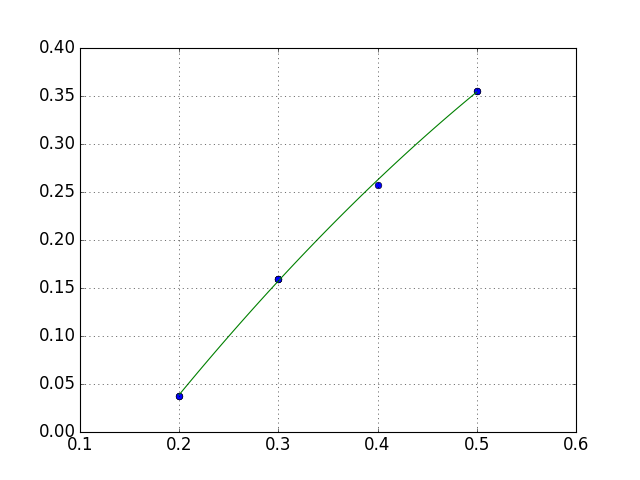

[-0.6711146   1.52095761 -0.23849294]


<IPython.core.display.Javascript object>


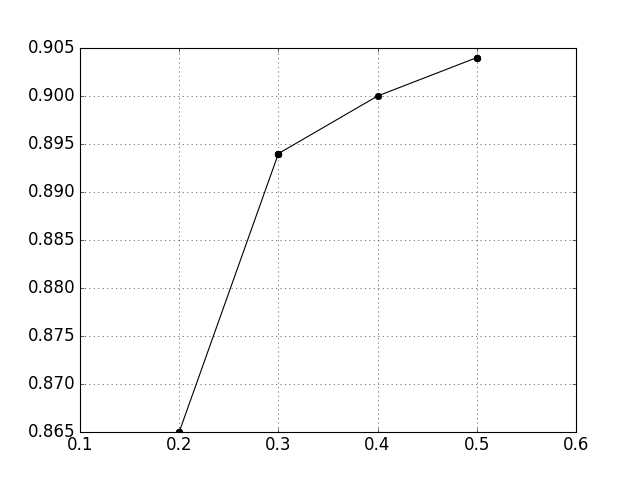

<IPython.core.display.Javascript object>


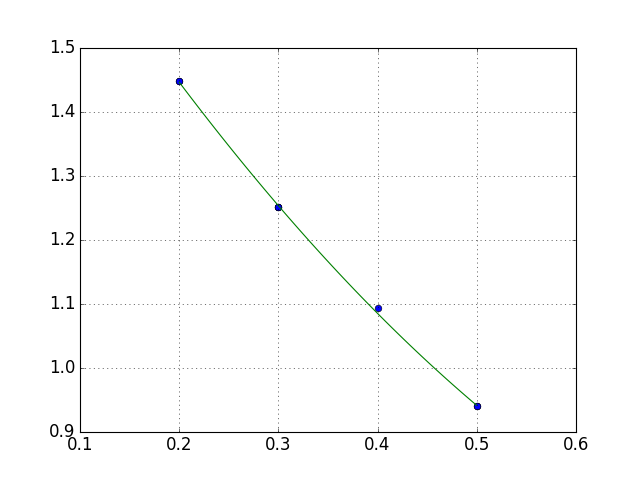

[ 1.23126148 -2.54578337  1.90653243]
Ffactor [ 1.44799049  1.44799049  1.25088239  1.25088239  1.25088239  1.09340659
  0.94009183  0.94009183]


(0.1, 0.6)

In [36]:
mean_nu_center = np.sort([.026,.058,.0062,.042,.0062,.058,.026,.026]) # ml/us
sigma_I = np.sort([.3,.5,.2,.4,.2,.5,.3,.3]) 
weird = np.sort([.894,.904,.865,.900,.865,.904,.894,.894])
nu_kin = 49.0 # um/s
nmpermonolayer = 0.3
umpersec_over_mlyperus = (nmpermonolayer/1e3*1e6)
nu_kin_ml = nu_kin/umpersec_over_mlyperus; #print nu_kin_ml
sigma_I_theory = np.linspace(min(sigma_I),max(sigma_I))

plt.figure()
plt.plot(sigma_I,mean_nu_center/nu_kin_ml,'o')
plt.grid('on')
ptop = np.polyfit(sigma_I,mean_nu_center/nu_kin_ml,2); print ptop
plt.plot(sigma_I_theory,np.polyval(ptop,sigma_I_theory))
plt.xlim([.1,.6])

plt.figure()
plt.plot(sigma_I,weird,'ko-')
plt.grid('on')
plt.xlim([.1,.6])

Ffactor_top = ptop[1]+2*ptop[0]*sigma_I
Ffactor = Ffactor_top/weird
plt.figure()
plt.plot(sigma_I,Ffactor,'o')
pFac = np.polyfit(sigma_I,Ffactor,2); print pFac
plt.plot(sigma_I_theory,np.polyval(pFac,sigma_I_theory))
plt.grid('on')
print 'Ffactor', Ffactor
plt.xlim([.1,.6])
